In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
import scipy.special as spc

# Dice game stopping at any perfect square

Asked during interview.

Throw a dice and sup up the draws until the sum is a perfect square, or you stop the game winning the budget.

Q1: _say you survived till some $b$, do you keep throwing?_

Imagine $b$ is between two squares, $(n-1)^2$ and $n^2$. Then, one would throw until $b\in\{n^2-6,..,n^2-1\}$. Throwing again implies throwing until $b\in\{(n+1)^2-6,..,(n+1)^2-1\}$ _if_ $n^2$ was never scored. In terms of rational player, the game stopping rule is:
$$\mathbb E[n^2-c]\ge\mathbb E[(n+1)^2-c]=\mathbb E[(n+1)^2-c|n^2\text{ never scored}]\mathbb P(n^2\text{ never scored}),$$
where in both cases $c$ has expected value 3.5.

The solution is somewhere between 10 and 11, with 11 winning averagely more than 10.

Q2: _how many shots does it averagely take?_

In https://stats.stackexchange.com/questions/3614/how-to-easily-determine-the-results-distribution-for-multiple-dice we find the solution:

1. compute the probability generating function (PGF) $p(x)$ of a single throw of die
$$p(x)=\frac x6\frac{1-x^6}{1-x}$$
2. elevate it to the $n$-th power to get the PGF of $n$ throws
$$p(x)^n=\frac {x^6}{6^n}\frac{(1-x^6)^n}{(1-x)^n}$$
3. Turn it into a summation using the Binomial Theorem. The $m$-th term of the PGF is $\mathbb P(X_1+X_2+..+X_n = m)$
$$\mathbb P(X_1+X_2+..+X_n = m)=\sum_{6k+j=m-n}\binom{n}{k}\binom{-n}{j}\frac{(-1)^{k+j}}{6^n}$$
you can make use of
$$\binom{-n}{j}=(-1)^j\binom{j+n-1}{j}$$
from https://arxiv.org/pdf/1105.3689.pdf, to get
$$\mathbb P(X_1+X_2+..+X_n = m)=\sum_{6k+j=m-n}\binom{n}{k}(-1)^j\binom{n+n-1}{j}\frac{(-1)^{k+j}}{6^n}=
\sum_{6k+j=m-n}\binom{n}{k}\binom{j+n-1}{j}\frac{(-1)^{k+2j}}{6^n}$$

## Optimal strategy

Here we solve a different problem. We actually answered the question "What's the best strategy **provided that we didn't hit a perfect square so far**". What if instead we start from $b=0$? Let's exclude the cases where 1 and 4 can cost us the budget and let's determine the maximal budget to stop the game.

The definition of the stopping routine includes the possibility to play other games, just keep ``stopper = -1`` to play this game.

In [2]:
def stop(draw,budget,stopper):
    if int(np.sqrt(budget) + 0.5) ** 2 == budget and stopper == -1 and budget > 6:
        return True
    if draw == stopper:
        return True
    return False

def play(n_games,stopper,strategy):
    wins = []
    for i in range(n_games):
        budget = 0
        while True:
            draw = np.random.random_integers(6)
            budget += draw
            if stop(draw,budget,stopper):
                wins.append(0)
                break
            if budget >= strategy:
                wins.append(budget)
                break
    return np.array(wins)

In [3]:
n_games = 4000
strat_min = 10
strat_max = 75

mean_wins = np.empty((1,0))
sdev_wins = np.empty((1,0))
all_wins  = np.empty((1,n_games))

for i in tnrange(strat_min,strat_max+1,desc = 'strategies ran'):
    wins      = play(n_games,-1,i)
    all_wins  = np.append(all_wins,[ wins ],axis = 1)
    mean_wins = np.append(mean_wins,wins.mean())
    sdev_wins = np.append(sdev_wins,wins.std())

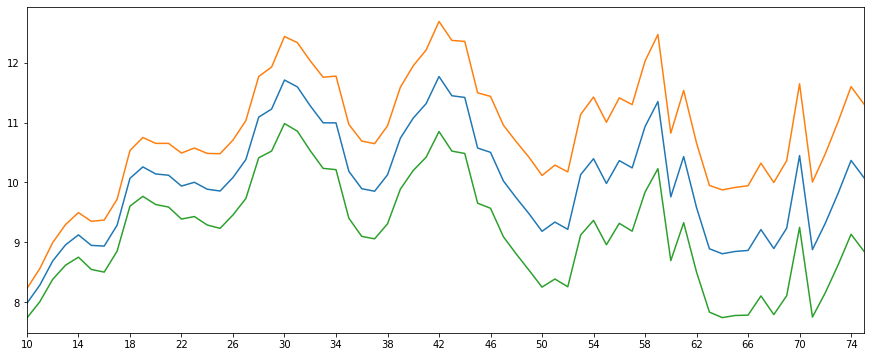

In [4]:
plt.figure(figsize=(15,6))

plt.plot(np.arange(strat_min, strat_max+1, 1),mean_wins)
plt.plot(np.arange(strat_min, strat_max+1, 1),mean_wins+3*sdev_wins/np.sqrt(n_games))
plt.plot(np.arange(strat_min, strat_max+1, 1),mean_wins-3*sdev_wins/np.sqrt(n_games))

plt.xticks(np.arange(strat_min, strat_max, 4))
plt.xlim(strat_min,strat_max)

plt.show()

It seems like one should stop when $b=42$, and the expected win usually drops around perfect squares indeed.

One can check out what averagely happens for a fixed strategy value, say exiting at 21.

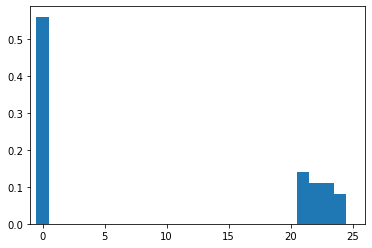

In [5]:
strategy = 21

wins = play(100000,-1,strategy)

bins = [ i-0.5 for i in range((int(np.sqrt(strategy))+1)**2+2)]
plt.hist(wins, bins=bins, density=True)
plt.xlim(0-1,(int(np.sqrt(strategy))+1)**2+1)
plt.xticks([(int(np.sqrt(strategy))+1)*i for i in range(int(np.sqrt(strategy))+2)])
plt.show()